In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import random
from fancyimpute import KNN

In [12]:
from google.colab import files
uploaded = files.upload()



Saving Absenteeism_at_work_Project.xls to Absenteeism_at_work_Project (1).xls


In [57]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Absenteeism_at_work_Project.xls']))
df.shape





(740, 21)

In [0]:
######## Now we will remove the time which is zero

In [58]:
df.dtypes
df.shape
# df.loc[:,'Work load Average/day '].head()
# df = df.loc[df['Absenteeism time in hours']!= 0,:]
# df['Absenteeism time in hours']!=0



(740, 21)

In [60]:
categorical_columns = ['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Disciplinary failure', 'Education', 'Social drinker',
       'Social smoker']
non_categorical_columns = [i for i in df.columns if i not in categorical_columns]
non_categorical_columns


for i in df.columns:
    if i in categorical_columns: 
        df[i] = pd.Categorical(df[i])
        

df.shape

(740, 21)

#### Missing Value Removal ##### 

In [61]:
## Making functions of getiing the missing values of tha data_set.
def get_percentage(dataframe_without_nan_values, original_dataframe):
    missing_percentage = round(100 - (len(dataframe_without_nan_values)/len(original_dataframe))*100,2)
    # Subtracted by 100 to get the original missing data and round is used to round the value upto 2 decimal places
    return str(missing_percentage)+'% of data is missing'
  
dataframe_without_nan_values = df.dropna()
print(get_percentage(dataframe_without_nan_values, df))
df.isnull().sum()


13.65% of data is missing


(740, 21)

## Pre-Processing of the Data

In [54]:
######################## Checking with mean,median, KNN imputation
## Creating Columns
columns_with_nan_values = []
columns_without_nan_values = []
for i in df.columns:
    if df[i].isnull().sum() > 0:
        columns_with_nan_values.append(i)
    else :
        columns_without_nan_values.append(i)
###### Missing Value analysis and finding out the percentage of missing values ######

missing_value = pd.DataFrame(df.isnull().sum()).reset_index()
missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_values'})
missing_value
missing_value['Missing_percentage'] = round(missing_value['Missing_values']/len(df)*100,2) 
missing_value = missing_value.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_value

,Variables,Missing_values,Missing_percentage
0,Body mass index,29,4.12
1,Absenteeism time in hours,22,3.12
2,Height,13,1.85
3,Work load Average/day,10,1.42
4,Education,10,1.42
5,Transportation expense,7,0.99
6,Son,6,0.85
7,Disciplinary failure,6,0.85
8,Hit target,6,0.85
9,Social smoker,4,0.57


In [62]:
index_Number_nan = df.dropna().index
random_number = []
for i in range(len(columns_with_nan_values)):
    random_number.append(random.choice(index_Number_nan))
    
data = df.copy()    
for i in range(len(columns_with_nan_values)):
    data[columns_with_nan_values[i]].loc[random_number[i]] = np.nan
    
actual_value = []
mean_value = []
median_value = []
for i in range(len(columns_with_nan_values)):
    actual_value.append(df[columns_with_nan_values[i]].loc[random_number[i]])
for i in range(len(columns_with_nan_values)):
    if columns_with_nan_values[i] in categorical_columns:
        mean_value.append(np.nan)#Categorical data has no mean(Error occur)
        median_value.append(np.nan)#Categorical data has no median
    else:
        mean_value.append(df[columns_with_nan_values[i]].mean())
        median_value.append(df[columns_with_nan_values[i]].mean())
        
frame ={'Actual Value': actual_value,'Mean': mean_value, 'Median': median_value}
data_frame = pd.DataFrame(data = frame, index = columns_with_nan_values, dtype =int)
data_frame
    

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


(18, 3)

In [63]:
###### Imputing Data with Knn Imputation #########
###### KNN Imputation is proving best so we are imputing it with knn #####

data_KNN = KNN(k=3).fit_transform(data)
data_KNN = pd.DataFrame(data = data_KNN, columns=data.columns)
knn_array = []
for i in range(len(columns_with_nan_values)):
    knn_array.append(int(data_KNN[columns_with_nan_values[i]].loc[random_number[i]]))
print(knn_array)    
data_frame['KNN_3'] = knn_array
data_frame

Imputing row 1/740 with 1 missing, elapsed time: 0.111
Imputing row 101/740 with 1 missing, elapsed time: 0.113
Imputing row 201/740 with 0 missing, elapsed time: 0.114
Imputing row 301/740 with 0 missing, elapsed time: 0.115
Imputing row 401/740 with 0 missing, elapsed time: 0.116
Imputing row 501/740 with 0 missing, elapsed time: 0.116
Imputing row 601/740 with 0 missing, elapsed time: 0.117
Imputing row 701/740 with 0 missing, elapsed time: 0.118
[25, 1, 288, 37, 11, 28, 323407, 92, 0, 2, 1, 0, 0, 0, 56, 170, 31, 11]


,Actual Value,Mean,Median,KNN_3
Reason for absence,23,NaN,NaN,25
Month of absence,7,NaN,NaN,1
Transportation expense,289,221.035,221.035,288
Distance from Residence to Work,36,29.6676,29.6676,37
Service time,11,12.5658,12.5658,11
Age,30,36.4491,36.4491,28
Work load Average/day,313532,271189,271189,323407
Hit target,93,94.5872,94.5872,92
Disciplinary failure,0,NaN,NaN,0
Education,1,NaN,NaN,2


In [72]:
# Applying the KNN imputation over the data (k = 3)
process_data = KNN(k=3).fit_transform(data)
process_data = pd.DataFrame(data = process_data, columns=data.columns)
# So, now on we will proccess further in KNN_pre_data
# converting all the non categorical value in integer

for i in process_data.columns:
    process_data[i]= process_data[i].astype('int')

for i in categorical_columns:
    process_data[i] = pd.Categorical(process_data[i])

Imputing row 1/740 with 1 missing, elapsed time: 0.115
Imputing row 101/740 with 1 missing, elapsed time: 0.116
Imputing row 201/740 with 0 missing, elapsed time: 0.117
Imputing row 301/740 with 0 missing, elapsed time: 0.118
Imputing row 401/740 with 0 missing, elapsed time: 0.119
Imputing row 501/740 with 0 missing, elapsed time: 0.120
Imputing row 601/740 with 0 missing, elapsed time: 0.120
Imputing row 701/740 with 0 missing, elapsed time: 0.121


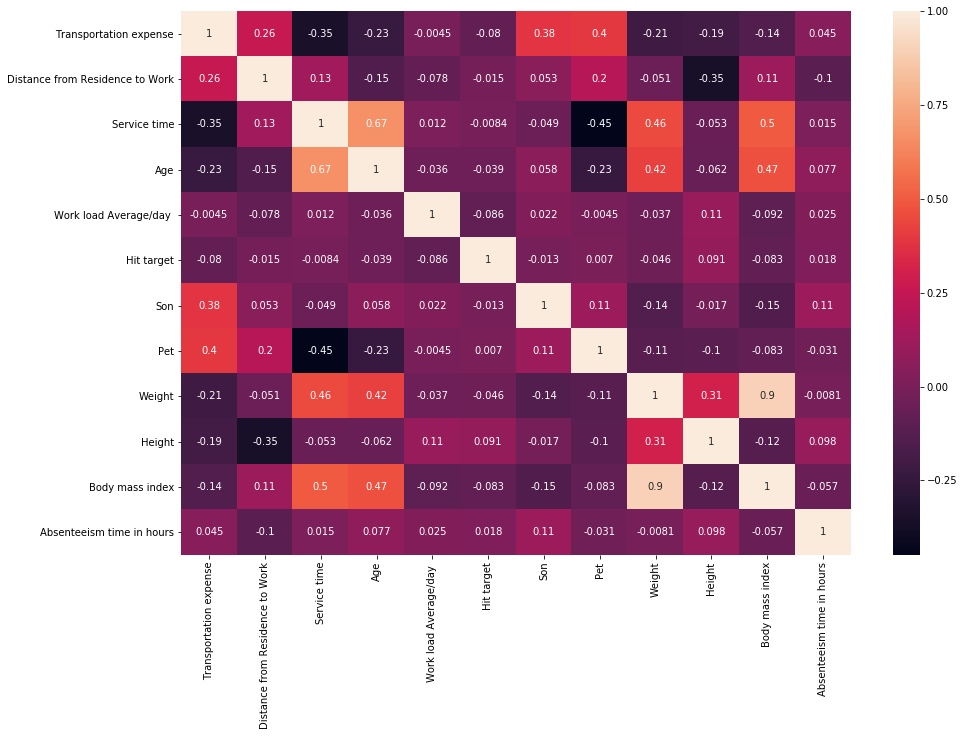

In [73]:
#Generating the correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 10))
heat = sns.heatmap(process_data.drop(['ID'],axis=1).corr(), annot = True)
heat.figure.savefig('Heatmap.png')

# Normalisation

In [74]:
process_data = process_data.drop(['Height','Weight'],axis=1)
# All the numerical data will be scaled
scaling_col = ['Transportation expense', 'Distance from Residence to Work','Service time',
              'Work load Average/day ', 'Hit target','Body mass index']
for i in scaling_col:
    process_data[i]=(process_data[i]-min(process_data[i]))/(max(process_data[i])-min(process_data[i]))
    print(i,': Scaling Done')

Transportation expense : Scaling Done
Distance from Residence to Work : Scaling Done
Service time : Scaling Done
Work load Average/day  : Scaling Done
Hit target : Scaling Done
Body mass index : Scaling Done


In [0]:
# Spliting the data set in train-test
from sklearn.model_selection import train_test_split
Pro_X = process_data.drop(['Absenteeism time in hours'], axis=1)
Pro_Y = process_data['Absenteeism time in hours']
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(Pro_X,Pro_Y, test_size=0.2)

In [0]:
# Return MAE, MRSE, R², Adjusted R²
def reg_acc(y_true, y_pre):
    from math import sqrt
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    print ("MSE of data: ", mean_squared_error(y_true,y_pre))
    print ("RMSE of data: ", sqrt(mean_squared_error(y_true,y_pre)))
    print ('Other Parameters:')
    print ("R² : ", r2_score(y_true,y_pre))
    print ('MAE:',mean_absolute_error(y_true,y_pre))

In [81]:
# Applying KNN Machine learnig algorithm
from sklearn.neighbors import KNeighborsRegressor
Pro_KNN_model = KNeighborsRegressor(n_neighbors=3).fit(X_TRAIN,Y_TRAIN)
Final_KNN_predict = Pro_KNN_model.predict(X_TEST)
reg_acc(Y_TEST,Final_KNN_predict)

MSE of data:  242.8656156156156
RMSE of data:  15.584146290882142
Other Parameters:
R² :  -0.5580638148868422
MAE: 5.948198198198198


In [82]:

#Applying linear regression machine learning algorithm
from sklearn.linear_model import LinearRegression
linReg = LinearRegression().fit(X_TRAIN,Y_TRAIN)
linear_predict = linReg.predict(X_TEST)
reg_acc(Y_TEST,linear_predict)
print('Intercept :',linReg.intercept_)
print('Coefficient')
for i,coef in zip(process_data.columns,linReg.coef_):
    print (i,"-->",coef)


MSE of data:  150.58276478557738
RMSE of data:  12.271216923580862
Other Parameters:
R² :  0.033961409632580875
MAE: 5.346304189156004
Intercept : 20.849490541071063
Coefficient
ID --> -0.15024695155716888
Reason for absence --> -0.5132837517929456
Month of absence --> -0.03608196797740202
Day of the week --> -0.623702055138633
Seasons --> 0.10568139793736239
Transportation expense --> -0.09125911504952251
Distance from Residence to Work --> -3.9788051748461553
Service time --> -8.031148682070981
Age --> 0.36900925672501445
Work load Average/day  --> -1.8474787584140844
Hit target --> 0.1344272959450329
Disciplinary failure --> -17.098915888609618
Education --> -2.072566515518303
Son --> 0.6981391693700274
Social drinker --> 1.5749191161305751
Social smoker --> -2.1154810104437844
Pet --> -0.40059876452847987
Body mass index --> -9.645530552915774


In [84]:

#Applying all the different machine learning algorithm to check which produce the best result
#################################################################
from sklearn import tree
Deci_tree_pre = tree.DecisionTreeRegressor().fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
print('Decision Tree ML #######################################################')
reg_acc(Deci_tree_pre,Y_TEST)
#################################################################
from sklearn.ensemble import RandomForestRegressor
Ran_for_pre = RandomForestRegressor(n_estimators=50).fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
print('Random Forest ML #######################################################')
reg_acc(Ran_for_pre,Y_TEST)
#################################################################
from sklearn.naive_bayes import GaussianNB
print('Naive Bayes ############################################################')
NB_pre = GaussianNB().fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
reg_acc(NB_pre,Y_TEST)



Decision Tree ML #######################################################
MSE of data:  520.7331081081081
RMSE of data:  22.819577299067312
Other Parameters:
R² :  -0.27360546578491274
MAE: 8.628378378378379
Random Forest ML #######################################################
MSE of data:  226.59410908382367
RMSE of data:  15.053043183483654
Other Parameters:
R² :  -1.065774626940573
MAE: 5.824479729729731
Naive Bayes ############################################################
MSE of data:  964.6216216216217
RMSE of data:  31.058358321418435
Other Parameters:
R² :  -0.626014167953632
MAE: 18.7027027027027


In [0]:
list_mae,list_mse,list_r2,num=[],[],[],[]
for i in range(50):
    if i%2!=0:
        dummy_KNN = KNeighborsRegressor(n_neighbors=i).fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
        num.append(i)
        list_mae.append(mean_absolute_error(dummy_KNN,Y_TEST))
        list_mse.append(mean_squared_error(dummy_KNN,Y_TEST))
        list_r2.append(r2_score(dummy_KNN,Y_TEST))

*********** M A E ***********
Kth Value: 31
Lowest MAE Value: 4.905187445510025


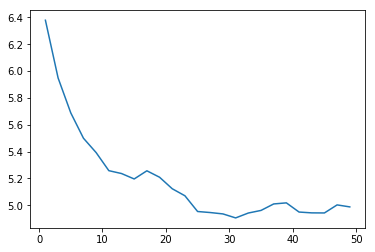

In [86]:
sns.lineplot(x=num,y=list_mae)
print('*********** M A E ***********')
print('Kth Value:',num[list_mae.index(min(list_mae))])
print('Lowest MAE Value:',min(list_mae))

*********** M S E ***********
Kth Value: 35
Lowest MSE Value: 147.7565140650855


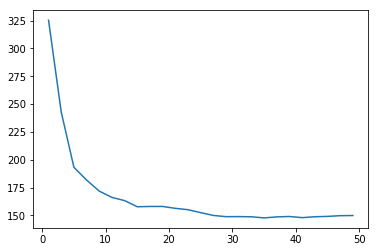

In [87]:
sns.lineplot(x=num,y=list_mse)
print('*********** M S E ***********')
print('Kth Value:',num[list_mse.index(min(list_mse))])
print('Lowest MSE Value:',min(list_mse))